In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from PIL import Image 
import math
%matplotlib inline


In [2]:
csv_img=pd.read_csv('mnist_train.csv')   #reading from csv file
csv_img #show csv file

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
csv_img.shape  #   60000 images and each image size is 28x28 =784 plus 1 label column =785

(60000, 785)

In [17]:
label_series=csv_img["label"]   # accessing a single label column 
label_series

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [18]:
csv_img["label"].value_counts() # count of values in a column

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [19]:
labels=label_series.values[:][:50] # first 50 labels
len(labels)

50

In [20]:
labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=int64)

In [21]:
csv_img.loc[0:49, csv_img.columns != 'label'] # First 50 rows and column excluded

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
csv_img

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Label: 1')

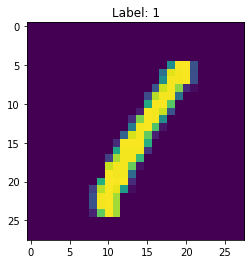

In [23]:
i = 3 # set any valid index of an image
label = csv_img.values[i][0] # retrieve label from first colum in dataframe
im_buf = csv_img.values[i][1:] # create flat array of only the pixels of the given image 
axis_len = int(math.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
im_array = np.int8(np.reshape(im_buf, (axis_len, axis_len))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

plt.imshow(np.asarray(img))
plt.title(f'Label: {label}')


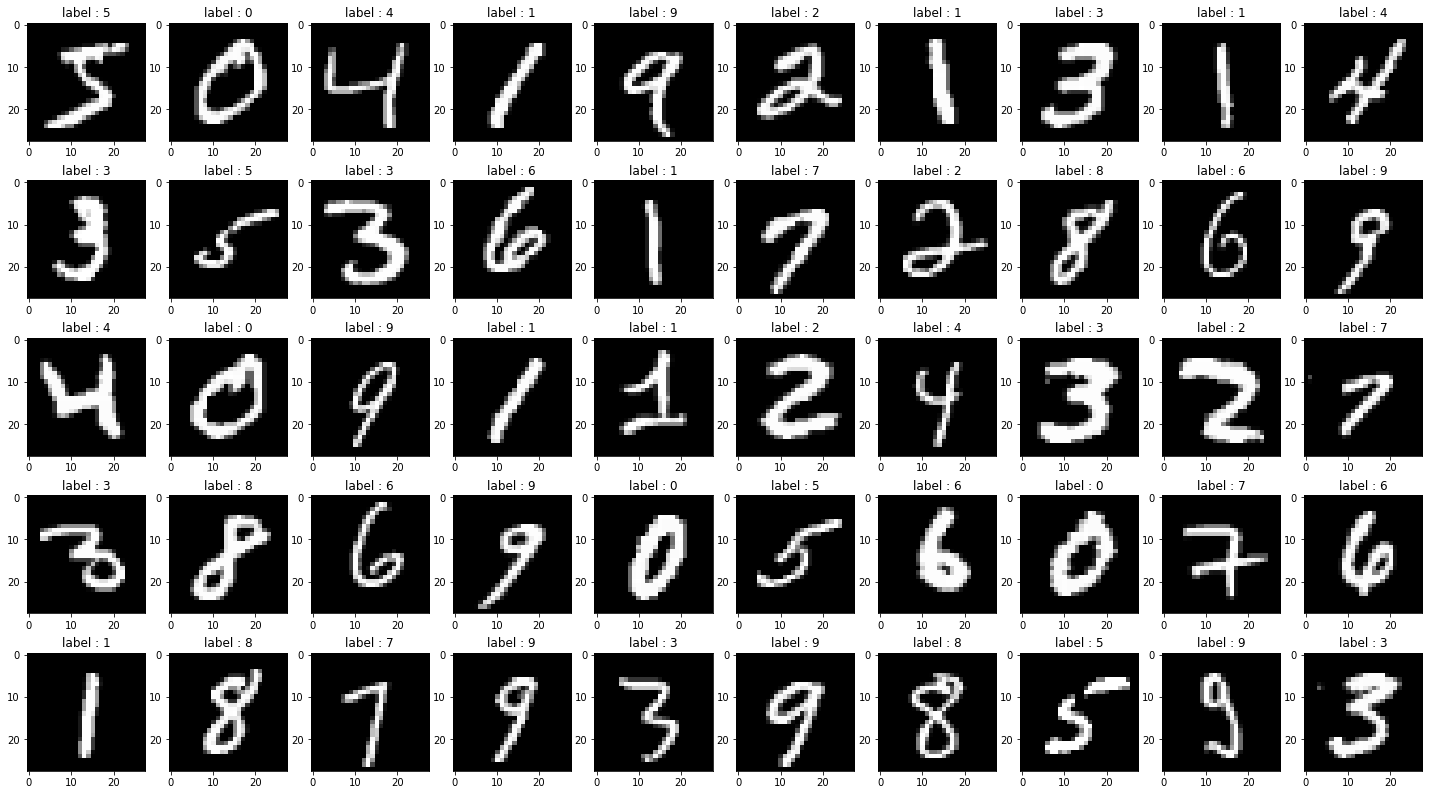

In [24]:
num_px = 28 # every image is 28x28

pictures = csv_img.loc[0:49, csv_img.columns != 'label'] # read first 50 lines exclude label column

pictures_count = pictures.shape[0]
fig = plt.figure(figsize=(25, 14))
columns = 10
rows = np.ceil(pictures_count / columns)
for i, row in pictures.iterrows():  # pandas iterrows interates over row 
    img = row.values.reshape((num_px, num_px))
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f'label : {labels[i]}')
plt.show()

In [26]:
ones=csv_img.loc[csv_img['label']==1,csv_img.columns != 'label']
ones

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
pictures=ones.loc[0:125]
train_set = pictures.sample(frac=0.70)  #randomly select 70% data for training
train_set
train_set.reset_index(drop=True,inplace=True)


14


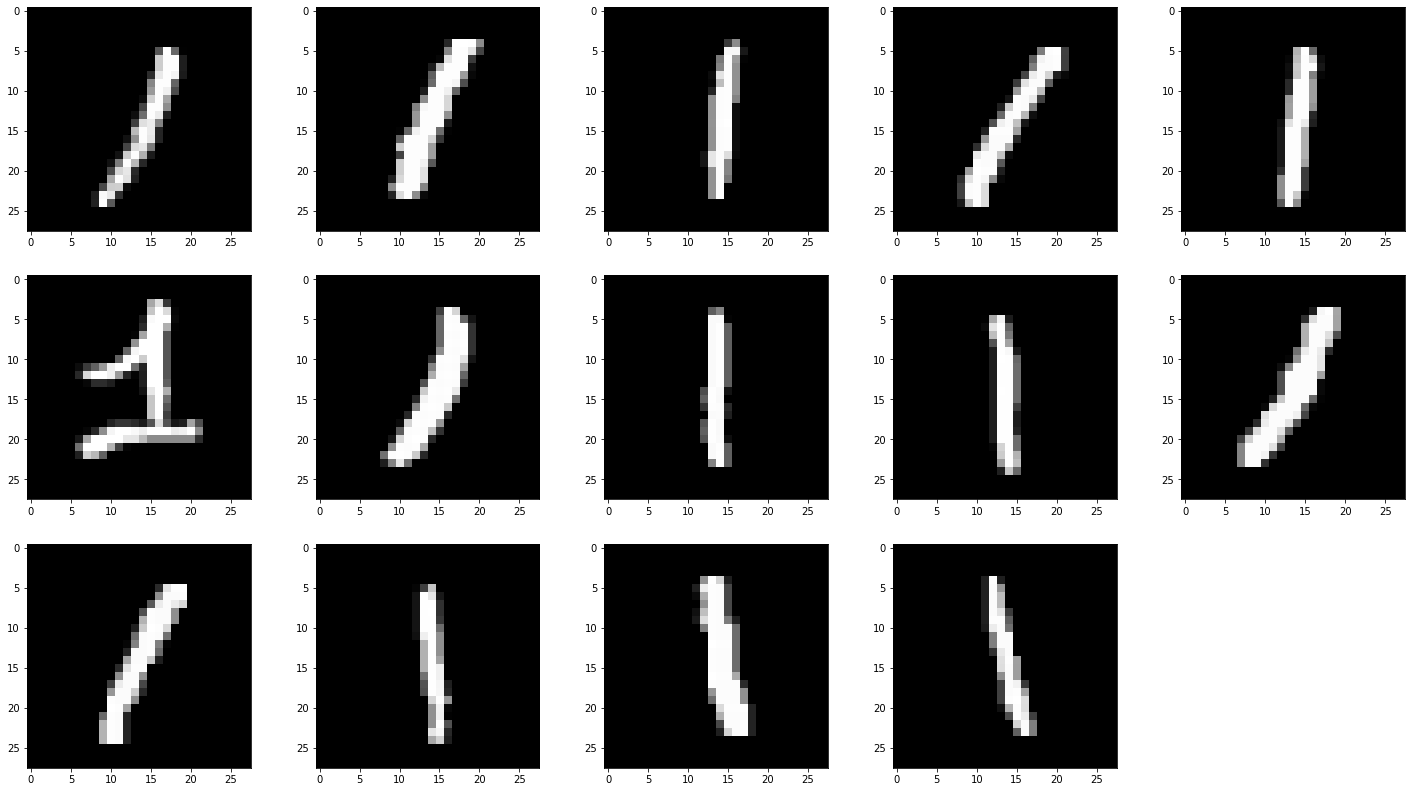

In [50]:
num_px = 28 # every image is 28x28
pictures=train_set
#pictures = csv_img.loc[0:49,csv_img['label']==1 & csv_img.columns != 'label'] # read first 50 lines exclude label column
pictures_count = pictures.shape[0]
print(pictures_count)
fig = plt.figure(figsize=(25,14))
columns =5 
rows = np.ceil(pictures_count / columns)
for i, row in pictures.iterrows():  # interates over rows 
    img = row.values.reshape((num_px, num_px))
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img, cmap="gray")
plt.show()